In [ ]:
import pandas as pd
df = pd.DataFrame()
row1 = {'SCI/SSCI论文数':109,'大口径-论文数':355,'小口径-论文数':49,'国家社科基金项目数':10,'国家自然基金项目数':15,'教育部项目数':5,'教材数':153}
row2 = {'SCI/SSCI论文数':103,'大口径-论文数':128,'小口径-论文数':99,'国家社科基金项目数':17,'国家自然基金项目数':18,'教育部项目数':4,'教材数':122}
row3 = {'SCI/SSCI论文数':23,'大口径-论文数':52,'小口径-论文数':23,'国家社科基金项目数':3,'国家自然基金项目数':8,'教育部项目数':0,'教材数':9}

df = df.append(row1,ignore_index=True)
df = df.append(row2,ignore_index=True)
df = df.append(row3,ignore_index=True)
df.rename(index={0:'应用经济学',1:'工商管理',2:'统计学'})

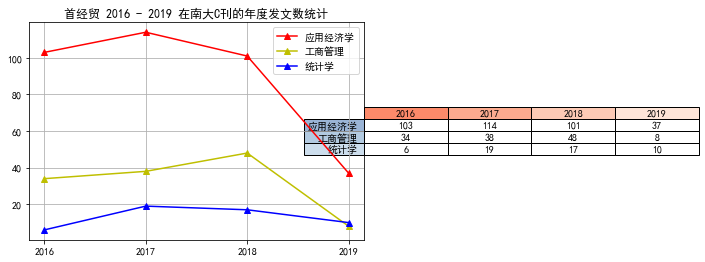

In [3]:
#统计图
import pandas as pd
import numpy as np
d1 = pd.read_excel('datas/大口径-应用经济学-高校年度发文数统计.xlsx')
d2 = pd.read_excel('datas/大口径-工商管理-高校年度发文数统计.xlsx')
d3 = pd.read_excel('datas/大口径-统计学-高校年度发文数统计.xlsx')

x = [2016,2017,2018,2019]
y1 = {}
for index, row in d1.iterrows():
    if row['高校名称'] == '首都经济贸易大学':
        for item in x:
            if str(item) == str(row['发表年份']):
                y1[item] = row['论文数']
y2 = {}
for index, row in d2.iterrows():
    if row['高校名称'] == '首都经济贸易大学':
        for item in x:
            if str(item) == str(row['发表年份']):
                y2[item] = row['论文数']
y3 = {}
for index, row in d3.iterrows():
    if row['高校名称'] == '首都经济贸易大学':
        for item in x:
            if str(item) == str(row['发表年份']):
                y3[item] = row['论文数']
Y1 = []
Y2 = []
Y3 = []
for item in x:
    Y1.append(y1[item])
    Y2.append(y2[item])
    Y3.append(y3[item])

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.grid()
plt.plot(x,Y1,'r-',marker='^',label='应用经济学')
plt.plot(x,Y2,'y-',marker='^',label='工商管理')
plt.plot(x,Y3,'b-',marker='^',label='统计学')
plt.xticks(x)
plt.legend()
df = pd.DataFrame()
table_val = [Y1,Y2,Y3]
plt.table(cellText=table_val,rowLabels=['应用经济学','工商管理','统计学'], colLabels=x,rowLoc='right',
          rowColours = plt.cm.BuPu(np.linspace(0, 0.4,5))[::-1],
          colColours = plt.cm.Reds(np.linspace(0, 0.4,5))[::-1],
          cellLoc = 'center',loc = 'right')
plt.title('首经贸 2016 - 2019 在南大C刊的年度发文数统计')
plt.show()

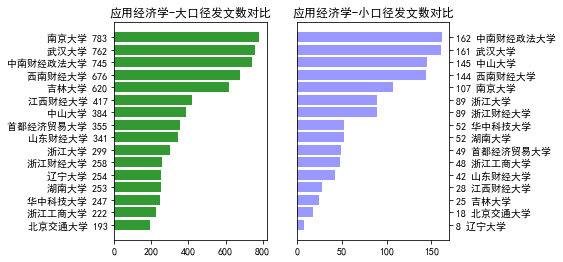

In [4]:
#高校发文数对比
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('datas/大口径-应用经济学-统计表.xlsx')
x= np.arange(len(data))
counts = [x for x in data['入围数统计']]
col = [x for x in data['高校名称']]

plt.figure()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
ax = plt.subplot(121)
plt.title('应用经济学-大口径发文数对比')

# 将数字加入标签
col_counts = []
for i in range(len(col)):
    mtext = col[i] +' ' + str(counts[i])
    col_counts.append(mtext)
ax.set_yticks(np.arange(len(col_counts)))
ax.set_yticklabels(col_counts)
ax.barh(np.arange(len(x)),counts,color='g',alpha=0.8) #matplotlib默认会改变轴的顺序，用这种方式固定按照我们希望的顺序

# for a,b in zip(col,counts):
#     plt.text(b+4,a, '%.0f' % b, ha='center', va= 'bottom',alpha=0.9)
#plt.show()

ax = plt.subplot(122)
data = pd.read_excel('datas/小口径-应用经济学-统计表.xlsx')
x= np.arange(len(data))
counts = [x for x in data['入围数统计']]
col = [x for x in data['高校名称']]
#将数字加入标签
col_counts = []
for i in range(len(col)):
    mtext =  str(counts[i])+' ' + col[i]
    col_counts.append(mtext)
plt.title('应用经济学-小口径发文数对比')
ax.barh(np.arange(len(x)),counts,color='b',alpha=0.4)
ax.set_yticks(np.arange(len(col_counts)))
ax.set_yticklabels(col_counts)
# for a,b in zip(col,counts):
#     plt.text(b+3,a, '%.0f' % b, ha='center', va= 'bottom',alpha=0.9)
ax.yaxis.tick_right()
plt.show()

### 词云

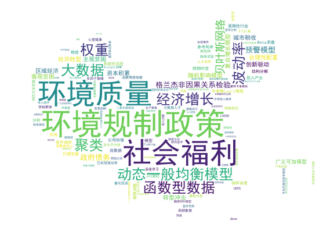

In [62]:
#关键词云
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('datas/首都经济贸易大学-统计学.xlsx')
data2 = pd.read_excel('datas/首都经济贸易大学-工商管理.xlsx')
data.keys()

kws = data['Keyword-关键词']
kws2 = data2['Keyword-关键词']
all_kw = []

for index,item in kws.items():
    kw = item.split(';')
    kw = [x for x in kw if x.strip() != '']
    all_kw = all_kw + kw
# with open('word.txt','w') as f:
#     f.write(str(all_kw))
all_kw2 = []
for index,item in kws2.items():
    kw = item.split(';')
    kw = [x for x in kw if x.strip() != '']
    all_kw2 = all_kw2 + kw

from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

texts = ' '.join(all_kw)
texts2 = ' '.join(all_kw2)

alice_coloring = np.array(Image.open('china.jpg'))
wordcloud = WordCloud(background_color='white',mask=alice_coloring,font_path='C:\\Windows\\Fonts\\simhei.ttf').generate(texts)
#print('首经贸-工商管理-关键词云')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['savefig.dpi'] = 80 #图片像素
plt.rcParams['figure.dpi'] = 120 #分辨率
#plt.title('首经贸-工商管理-关键词云')
#plt.savefig('年度热点/' + key + '.jpg')
plt.show()


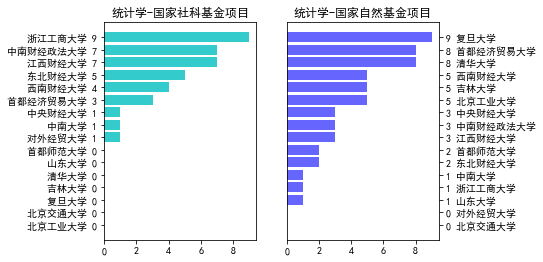

In [3]:
#同一张图绘制国家社科项目、国家自然项目对比
import pandas as pd
import numpy as np
d1 = pd.read_excel('datas/国家社科-统计学-统计表.xlsx')
d2 = pd.read_excel('datas/国家自然-统计学-统计表.xlsx')
import matplotlib.pyplot as plt
count1 = [x for x in d1['国家社科立项数']]
count2 = [x for x in d2['国家自然基金项目数']]
col1 = [x for x in d1['学校']]
col2 = [x for x in d2['学校']]

col1_counts = []
col2_counts = []
for i in range(len(col1)):
    text1 = col1[i] + ' ' + str(count1[i])
    text2 = str(count2[i]) + ' ' + col2[i]
    col1_counts.append(text1)
    col2_counts.append(text2)

plt.figure()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
ax1 = plt.subplot(121)
plt.title('统计学-国家社科基金项目')
ax1.barh(np.arange(len(col1_counts)),count1,color='c',alpha=0.8)
ax1.set_yticks(np.arange(len(col1_counts)))
ax1.set_yticklabels(col1_counts)

ax2 = plt.subplot(122)
plt.title('统计学-国家自然基金项目')
ax2.barh(np.arange(len(col2_counts)),count2,color='b',alpha=0.6)
ax2.set_yticks(np.arange(len(col2_counts)))
ax2.set_yticklabels(col2_counts)
ax2.yaxis.tick_right()

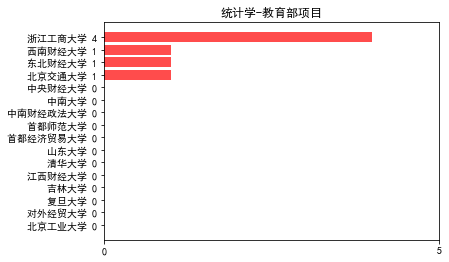

In [9]:
#教育部项目
import numpy as np
data = pd.read_excel('datas/教育部-统计学-统计表.xlsx')
data.keys()
col = [x for x in data['学校']]
counts = [x for x in data['教育部项目数']]
col_counts = []
for i in range(len(col)):
    text = col[i] + ' ' + str(counts[i])
    col_counts.append(text)
ax = plt.subplot()
ax.barh(np.arange(len(col_counts)),counts,color='r',alpha=0.7)
ax.set_yticks(np.arange(len(col_counts)))
ax.set_yticklabels(col_counts)

plt.title('统计学-教育部项目')
plt.xticks(np.arange(0,10,5))
plt.show()

### 数据检查

In [76]:
d1 = pd.read_excel('datas/大口径-统计学-统计表.xlsx')
print(d1)
d2 = pd.read_excel('datas/小口径-统计学-统计表.xlsx')
print(d2)

    入围数统计   学科      高校名称
5      47  统计学    北京工业大学
4      34  统计学    北京交通大学
0      53  统计学    东北财经大学
8      32  统计学    对外经贸大学
7      30  统计学      复旦大学
6      71  统计学      吉林大学
10     41  统计学    江西财经大学
12     38  统计学      清华大学
9      42  统计学      山东大学
15     52  统计学  首都经济贸易大学
14      2  统计学    首都师范大学
13     59  统计学    西南财经大学
11     30  统计学    浙江工商大学
2     219  统计学  中南财经政法大学
1      44  统计学      中南大学
3      63  统计学    中央财经大学
     学科  入围数统计      高校名称
4   统计学     12    北京工业大学
5   统计学      2    北京交通大学
2   统计学     20    东北财经大学
14  统计学      8    对外经贸大学
11  统计学     24      复旦大学
9   统计学     12      吉林大学
1   统计学      8    江西财经大学
6   统计学     23      清华大学
12  统计学      7      山东大学
15  统计学     23  首都经济贸易大学
8   统计学      3    首都师范大学
3   统计学     23    西南财经大学
0   统计学     18    浙江工商大学
10  统计学     24  中南财经政法大学
13  统计学      3      中南大学
7   统计学     18    中央财经大学
